# Stock Market Analysis

In [284]:
import pandas as pd
import numpy as np
#%matplotlib inline
from matplotlib import pyplot as plt
from pandas import Series
from pandas import DataFrame
from pandas import concat

# Train test split
from sklearn.model_selection import TimeSeriesSplit


# Models
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Model evaluators
from sklearn.metrics import f1_score,confusion_matrix

### Reading the Train Data

In [285]:
train = pd.read_csv("D:/PhD/PAPERS/PAPER 2/final paper/venky_modified/venky_modified/Input data/Train.csv")
type(train)
#train.dtype
train
#train.info()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000
...,...,...,...,...,...,...,...
1221,2012-01-11,14360,14750,14280,14590,1043400,15191988000
1222,2012-01-10,13890,14390,13860,14390,952300,13533413000
1223,2012-01-06,13990,14030,13790,13850,765500,10635609000
1224,2012-01-05,13720,13840,13600,13800,511500,7030811000


In [286]:
train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [287]:
train.describe()

,Open,High,Low,Close,Volume,Stock Trading
count,1226.000000,1226.000000,1226.000000,1226.000000,1.226000e+03,1.226000e+03
mean,33754.416803,34178.784666,33347.903752,33760.583197,7.275556e+05,2.440933e+10
std,10813.440409,10936.326802,10695.664102,10815.661389,4.137178e+05,1.526300e+10
min,13720.000000,13840.000000,13600.000000,13720.000000,1.391000e+05,3.966140e+09
25%,27788.750000,28091.250000,27401.250000,27675.000000,4.873000e+05,1.454097e+10
50%,34445.000000,34835.000000,33925.000000,34412.500000,6.260000e+05,2.153772e+10
75%,41412.500000,41900.000000,40810.000000,41365.000000,8.267000e+05,3.015922e+10
max,61550.000000,61970.000000,60740.000000,61930.000000,4.937300e+06,1.460450e+11


<AxesSubplot:>

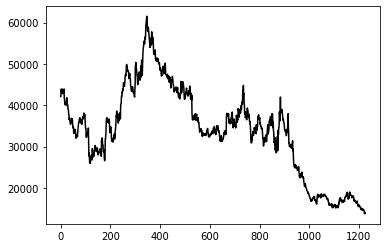

In [288]:
train['Open'].plot(color='k')

In [289]:
 train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


Seperating the DateTime field to data, month and year into different columns.

In [290]:
train['Year'] = pd.DatetimeIndex(train['Date']).year
train['Month'] = pd.DatetimeIndex(train['Date']).month
train['Day'] = pd.DatetimeIndex(train['Date']).day

In [291]:
train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading,Year,Month,Day
0,2016-12-30,42120,42330,41700,41830,610000,25628028000,2016,12,30
1,2016-12-29,43000,43220,42540,42660,448400,19188227000,2016,12,29
2,2016-12-28,43940,43970,43270,43270,339900,14780670000,2016,12,28
3,2016-12-27,43140,43700,43140,43620,400100,17427993000,2016,12,27
4,2016-12-26,43310,43660,43090,43340,358200,15547803000,2016,12,26


Function for dropping of unnecesary features or redundant features

In [292]:
def drop_features(features,data):
    data.drop(features,inplace=True,axis=1)

In [293]:
drop_features(['Date'],train)

### Applying the TimeSeries Feature Engineering
#### Lag Features

In [294]:
#Applying Lag Features to Opening Price
open1 = Series(train['Open'])
open_dataframe = concat([open1.shift(-3), open1.shift(-2), open1.shift(-1)], axis=1)
open_dataframe.columns = ['O_t-3', 'O_t-2', 'O_t-1']
open_dataframe.shape

(1226, 3)

In [295]:
open_dataframe.head()

,O_t-3,O_t-2,O_t-1
0,43140.0,43940.0,43000.0
1,43310.0,43140.0,43940.0
2,43660.0,43310.0,43140.0
3,43900.0,43660.0,43310.0
4,42910.0,43900.0,43660.0


In [296]:
#combining the train data and the lag features of Temp
train1 = pd.concat([train, open_dataframe], axis=1)

In [297]:
train1.head()

,Open,High,Low,Close,Volume,Stock Trading,Year,Month,Day,O_t-3,O_t-2,O_t-1
0,42120,42330,41700,41830,610000,25628028000,2016,12,30,43140.0,43940.0,43000.0
1,43000,43220,42540,42660,448400,19188227000,2016,12,29,43310.0,43140.0,43940.0
2,43940,43970,43270,43270,339900,14780670000,2016,12,28,43660.0,43310.0,43140.0
3,43140,43700,43140,43620,400100,17427993000,2016,12,27,43900.0,43660.0,43310.0
4,43310,43660,43090,43340,358200,15547803000,2016,12,26,42910.0,43900.0,43660.0


In [298]:
train1.tail()

,Open,High,Low,Close,Volume,Stock Trading,Year,Month,Day,O_t-3,O_t-2,O_t-1
1221,14360,14750,14280,14590,1043400,15191988000,2012,1,11,13720.0,13990.0,13890.0
1222,13890,14390,13860,14390,952300,13533413000,2012,1,10,14050.0,13720.0,13990.0
1223,13990,14030,13790,13850,765500,10635609000,2012,1,6,NaN,14050.0,13720.0
1224,13720,13840,13600,13800,511500,7030811000,2012,1,5,NaN,NaN,14050.0
1225,14050,14050,13700,13720,559100,7719804000,2012,1,4,NaN,NaN,NaN


In [299]:
#Applying Lag Features to Opening Price
close_vals = Series(train['Close'])
close_dataframe = concat([close_vals.shift(-3), close_vals.shift(-2), close_vals.shift(-1)], axis=1)
close_dataframe.columns = ['C_t-3', 'C_t-2', 'C_t-1']
close_dataframe.shape

(1226, 3)

In [300]:
#combining the train data and the lag features of Temp
train1 = pd.concat([train1, close_dataframe], axis=1)

In [301]:
train1.head()

,Open,High,Low,Close,Volume,Stock Trading,Year,Month,Day,O_t-3,O_t-2,O_t-1,C_t-3,C_t-2,C_t-1
0,42120,42330,41700,41830,610000,25628028000,2016,12,30,43140.0,43940.0,43000.0,43620.0,43270.0,42660.0
1,43000,43220,42540,42660,448400,19188227000,2016,12,29,43310.0,43140.0,43940.0,43340.0,43620.0,43270.0
2,43940,43970,43270,43270,339900,14780670000,2016,12,28,43660.0,43310.0,43140.0,43480.0,43340.0,43620.0
3,43140,43700,43140,43620,400100,17427993000,2016,12,27,43900.0,43660.0,43310.0,44000.0,43480.0,43340.0
4,43310,43660,43090,43340,358200,15547803000,2016,12,26,42910.0,43900.0,43660.0,43620.0,44000.0,43480.0


In [302]:
train1.tail()

,Open,High,Low,Close,Volume,Stock Trading,Year,Month,Day,O_t-3,O_t-2,O_t-1,C_t-3,C_t-2,C_t-1
1221,14360,14750,14280,14590,1043400,15191988000,2012,1,11,13720.0,13990.0,13890.0,13800.0,13850.0,14390.0
1222,13890,14390,13860,14390,952300,13533413000,2012,1,10,14050.0,13720.0,13990.0,13720.0,13800.0,13850.0
1223,13990,14030,13790,13850,765500,10635609000,2012,1,6,NaN,14050.0,13720.0,NaN,13720.0,13800.0
1224,13720,13840,13600,13800,511500,7030811000,2012,1,5,NaN,NaN,14050.0,NaN,NaN,13720.0
1225,14050,14050,13700,13720,559100,7719804000,2012,1,4,NaN,NaN,NaN,NaN,NaN,NaN


In [303]:
#dropping null value rows
train1.dropna(inplace = True)

In [304]:
train1.tail()

,Open,High,Low,Close,Volume,Stock Trading,Year,Month,Day,O_t-3,O_t-2,O_t-1,C_t-3,C_t-2,C_t-1
1218,14610,14670,14530,14610,360100,5255652000,2012,1,16,14360.0,14520.0,14740.0,14590.0,14520.0,14770.0
1219,14740,14780,14450,14770,1543700,22669096000,2012,1,13,13890.0,14360.0,14520.0,14390.0,14590.0,14520.0
1220,14520,14600,14330,14520,540500,7814121000,2012,1,12,13990.0,13890.0,14360.0,13850.0,14390.0,14590.0
1221,14360,14750,14280,14590,1043400,15191988000,2012,1,11,13720.0,13990.0,13890.0,13800.0,13850.0,14390.0
1222,13890,14390,13860,14390,952300,13533413000,2012,1,10,14050.0,13720.0,13990.0,13720.0,13800.0,13850.0


In [305]:
train1.shape

(1223, 15)

In [306]:
#since for combining of data, both should have same number of rows. hence, removing the extra row
#train1.drop(train1.head(1).index, inplace=True)
#train1.shape

#### Rolling Window Statistics

In [307]:
# Appling window Features for the Highest Value Feature
high = train['High']
w = 30

In [308]:
shift = high.shift(-w+1)

In [309]:
train['High'].head()

0    42330
1    43220
2    43970
3    43700
4    43660
Name: High, dtype: int64

In [310]:
shift.head()

0    39710.0
1    39750.0
2    38980.0
3    38690.0
4    37940.0
Name: High, dtype: float64

In [311]:
window = shift.rolling(window=w)


In [312]:
type(window)

pandas.core.window.rolling.Rolling

In [313]:
window.min().head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: High, dtype: float64

In [314]:
window.min().tail(50)

1176    15480.0
1177    15250.0
1178    15200.0
1179    15200.0
1180    15030.0
1181    15020.0
1182    15020.0
1183    15020.0
1184    14790.0
1185    14790.0
1186    14790.0
1187    14790.0
1188    14790.0
1189    14670.0
1190    14670.0
1191    14600.0
1192    14600.0
1193    14390.0
1194    14030.0
1195    13840.0
1196    13840.0
1197        NaN
1198        NaN
1199        NaN
1200        NaN
1201        NaN
1202        NaN
1203        NaN
1204        NaN
1205        NaN
1206        NaN
1207        NaN
1208        NaN
1209        NaN
1210        NaN
1211        NaN
1212        NaN
1213        NaN
1214        NaN
1215        NaN
1216        NaN
1217        NaN
1218        NaN
1219        NaN
1220        NaN
1221        NaN
1222        NaN
1223        NaN
1224        NaN
1225        NaN
Name: High, dtype: float64

In [315]:
df = concat([window.min(), window.mean(), window.max(), high], axis=1)
df.columns = ['min', 'mean', 'max', 'high']

In [316]:
df.head()

,min,mean,max,high
0,NaN,NaN,NaN,42330
1,NaN,NaN,NaN,43220
2,NaN,NaN,NaN,43970
3,NaN,NaN,NaN,43700
4,NaN,NaN,NaN,43660


In [317]:
#dropping null values
df.dropna(inplace = True)
df.shape

(1168, 4)

In [318]:
#combining the train1 and the rolling window features
train2 = pd.concat([train1, df], axis=1)

In [319]:
train2.head()

,Open,High,Low,Close,Volume,Stock Trading,Year,Month,Day,O_t-3,O_t-2,O_t-1,C_t-3,C_t-2,C_t-1,min,mean,max,high
0,42120,42330,41700,41830,610000,25628028000,2016,12,30,43140.0,43940.0,43000.0,43620.0,43270.0,42660.0,NaN,NaN,NaN,NaN
1,43000,43220,42540,42660,448400,19188227000,2016,12,29,43310.0,43140.0,43940.0,43340.0,43620.0,43270.0,NaN,NaN,NaN,NaN
2,43940,43970,43270,43270,339900,14780670000,2016,12,28,43660.0,43310.0,43140.0,43480.0,43340.0,43620.0,NaN,NaN,NaN,NaN
3,43140,43700,43140,43620,400100,17427993000,2016,12,27,43900.0,43660.0,43310.0,44000.0,43480.0,43340.0,NaN,NaN,NaN,NaN
4,43310,43660,43090,43340,358200,15547803000,2016,12,26,42910.0,43900.0,43660.0,43620.0,44000.0,43480.0,NaN,NaN,NaN,NaN


In [320]:
#Dropping the High feature(redundant)
drop_features(['High'],train2)

In [321]:
train2.tail()

,Open,Low,Close,Volume,Stock Trading,Year,Month,Day,O_t-3,O_t-2,O_t-1,C_t-3,C_t-2,C_t-1,min,mean,max,high
1218,14610,14530,14610,360100,5255652000,2012,1,16,14360.0,14520.0,14740.0,14590.0,14520.0,14770.0,NaN,NaN,NaN,NaN
1219,14740,14450,14770,1543700,22669096000,2012,1,13,13890.0,14360.0,14520.0,14390.0,14590.0,14520.0,NaN,NaN,NaN,NaN
1220,14520,14330,14520,540500,7814121000,2012,1,12,13990.0,13890.0,14360.0,13850.0,14390.0,14590.0,NaN,NaN,NaN,NaN
1221,14360,14280,14590,1043400,15191988000,2012,1,11,13720.0,13990.0,13890.0,13800.0,13850.0,14390.0,NaN,NaN,NaN,NaN
1222,13890,13860,14390,952300,13533413000,2012,1,10,14050.0,13720.0,13990.0,13720.0,13800.0,13850.0,NaN,NaN,NaN,NaN


#### Expanding window Statistics

In [322]:
train2.dropna(inplace=True)

In [323]:
#Applying Expanding window for the Lowest Value
low= train['Low']
window = low.expanding()
dfc = concat([window.min(), window.mean(), window.max(), low.shift(-1),low], axis=1)
dfc.columns = ['min', 'mean', 'max', 't+1','low']

In [324]:
#no null values
dfc.shape

(1226, 5)

In [325]:
#to make it equal to the train2, dropping forst 4 values
#dfc.drop(dfc.head(4).index, inplace=True)

In [326]:
dfc.shape

(1226, 5)

In [327]:
#concating the expanding window features to the previous train2.
train_final = pd.concat([train2, dfc], axis=1)
#Dropping the CO2 feature(redundant)
drop_features(['Low'],train_final)

In [328]:
train_final.tail()

,Open,Close,Volume,Stock Trading,Year,Month,Day,O_t-3,O_t-2,O_t-1,...,C_t-1,min,mean,max,high,min,mean,max,t+1,low
1221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14280.0,33412.094926,60740.0,13860.0,14280
1222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13860.0,33396.107931,60740.0,13790.0,13860
1223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13790.0,33380.089869,60740.0,13600.0,13790
1224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13600.0,33363.942857,60740.0,13700.0,13600
1225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13600.0,33347.903752,60740.0,NaN,13700


In [329]:
#Replacing the null values with -1 if any.
train_final.dropna(inplace = True)

In [330]:
#Complete final Train Data
train_final.shape

(1168, 22)

### Splitting of Data

In [331]:
from sklearn.model_selection import train_test_split

In [332]:
X_train,X_test,y_train,y_test = train_test_split(train_final.drop('Close',axis=1)
                                                 ,train_final['Close'],random_state=42)



actual=(y_test.to_numpy(dtype ='float32'))
actual=np.sort(actual)


In [333]:
y_train.head()

1074    17220.0
841     36300.0
985     20830.0
657     32875.0
1002    17860.0
Name: Close, dtype: float64

In [334]:
X_train.head()

,Open,Volume,Stock Trading,Year,Month,Day,O_t-3,O_t-2,O_t-1,C_t-3,...,C_t-1,min,mean,max,high,min,mean,max,t+1,low
1074,17460.0,856100.0,1.486360e+10,2012.0,8.0,10.0,16630.0,16950.0,17220.0,16840.0,...,17610.0,15460.0,16189.333333,17680.0,17590.0,15810.0,35741.627907,60740.0,17210.0,17210
841,36450.0,554700.0,2.014420e+10,2013.0,7.0,24.0,37300.0,36800.0,36000.0,36150.0,...,36650.0,29650.0,34396.666667,38750.0,36600.0,25305.0,38667.197150,60740.0,35950.0,36100
985,20610.0,562500.0,1.166280e+10,2012.0,12.0,18.0,19980.0,20060.0,20320.0,20200.0,...,20500.0,16920.0,18510.000000,20910.0,20840.0,20050.0,37362.494929,60740.0,20220.0,20540
657,33295.0,475900.0,1.573133e+10,2014.0,4.0,24.0,33825.0,33805.0,33120.0,33700.0,...,33275.0,33140.0,36203.666667,38770.0,33465.0,25305.0,39582.416413,60740.0,32815.0,32830
1002,17790.0,397800.0,7.062976e+09,2012.0,11.0,22.0,17400.0,17400.0,17600.0,17420.0,...,17620.0,16250.0,17337.333333,18080.0,17860.0,17640.0,37049.312064,60740.0,17470.0,17640


### Applying Regressor Model

### Linear Regression

In [335]:
from sklearn.linear_model import LinearRegression
model1= LinearRegression()
model1.fit(X_train,y_train)
predict_L=model1.predict(X_test)
predict_L=np.sort(predict_L)
absolute_error1=abs(actual-predict_L)
#absolute_error1=np.transpose(absolute_error1)



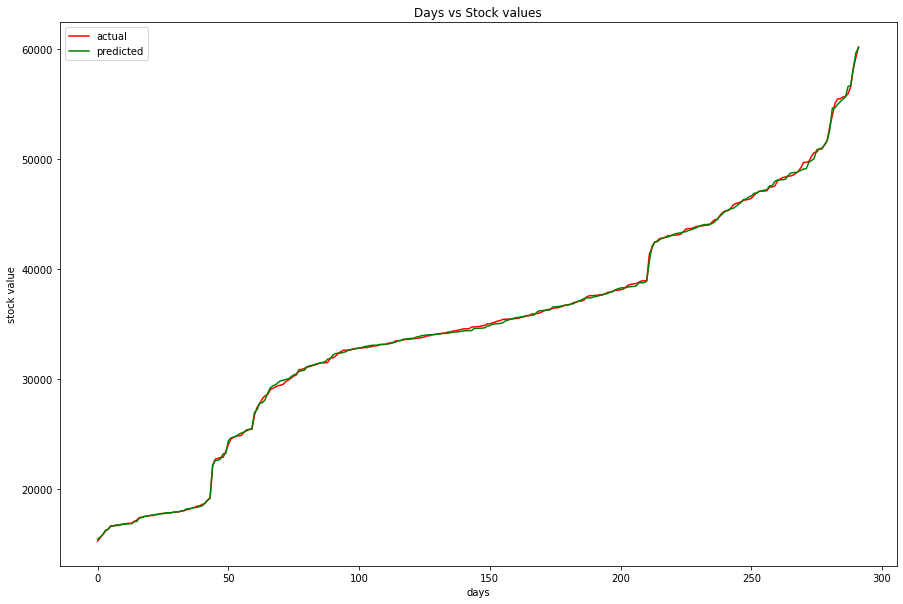

In [336]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(actual, color='r', label='actual')
ax.plot(predict_L, color='g', label='predicted')
leg = ax.legend();
ax.set_xlabel("days")
ax.set_ylabel("stock value")
ax.set_title("Days vs Stock values")
fig.savefig('D:/PhD/PAPERS/PAPER 2/final paper/venky_modified/venky_modified/MYOUTPUTRESULTS/Linear_regresson.png')
#d = {'actual': [actual], predicted : [predict_L]}
DF = pd.DataFrame(data=[actual, predict_L, absolute_error1]).T
DF.columns=['actual', 'L_predicted', 'absolute_error']
# save the dataframe as a csv file
DF.to_csv("D:/PhD/PAPERS/PAPER 2/final paper/venky_modified/venky_modified/MYOUTPUTdata/data_L_regression.csv")

### Dession Tree Regression

In [337]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()
model2.fit(X_train,y_train)
predict_Decision=model2.predict(X_test)
predict_Decision=np.sort(predict_Decision)

absolute_error2=abs(actual-predict_Decision)


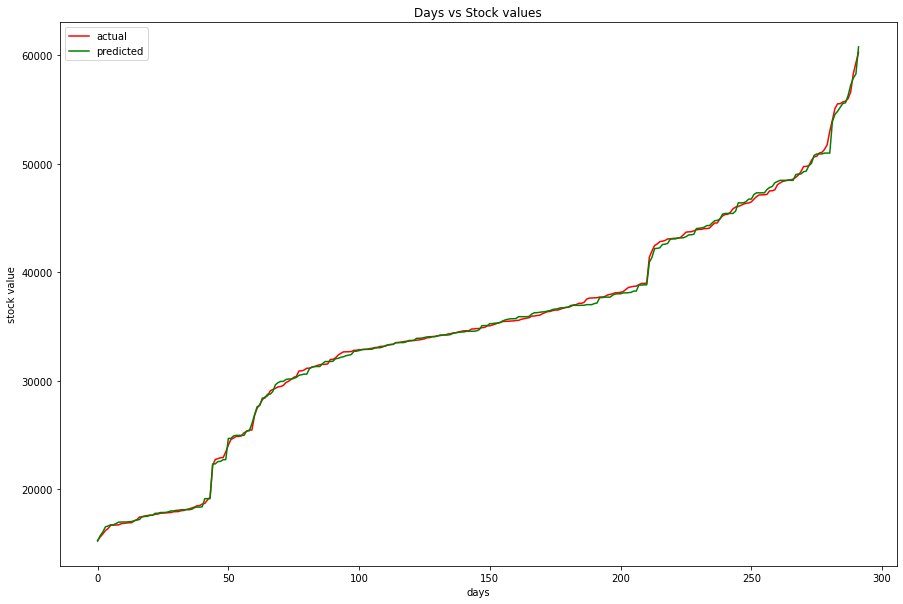

In [338]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(actual, color='r', label='actual')
ax.plot(predict_Decision, color='g', label='predicted')
leg = ax.legend();
ax.set_xlabel("days")
ax.set_ylabel("stock value")
ax.set_title("Days vs Stock values")
fig.savefig('D:/PhD/PAPERS/PAPER 2/final paper/venky_modified/venky_modified/MYOUTPUTRESULTS/Decision_tree_regresson.png')

DF = pd.DataFrame(data=[actual, predict_Decision, absolute_error2]).T
DF.columns=['actual', 'predict_Decision', 'absolute_error']
# save the dataframe as a csv file
DF.to_csv("D:/PhD/PAPERS/PAPER 2/final paper/venky_modified/venky_modified/MYOUTPUTdata/data_Decision_regression.csv")

### Random Forest Regression

In [339]:
model3=RandomForestRegressor()

In [340]:
model3.fit(X_train,y_train)

RandomForestRegressor()

In [341]:
predict_randomForest=model3.predict(X_test)

predict_randomForest=np.sort(predict_randomForest)
absolute_error3=abs(actual-predict_randomForest)


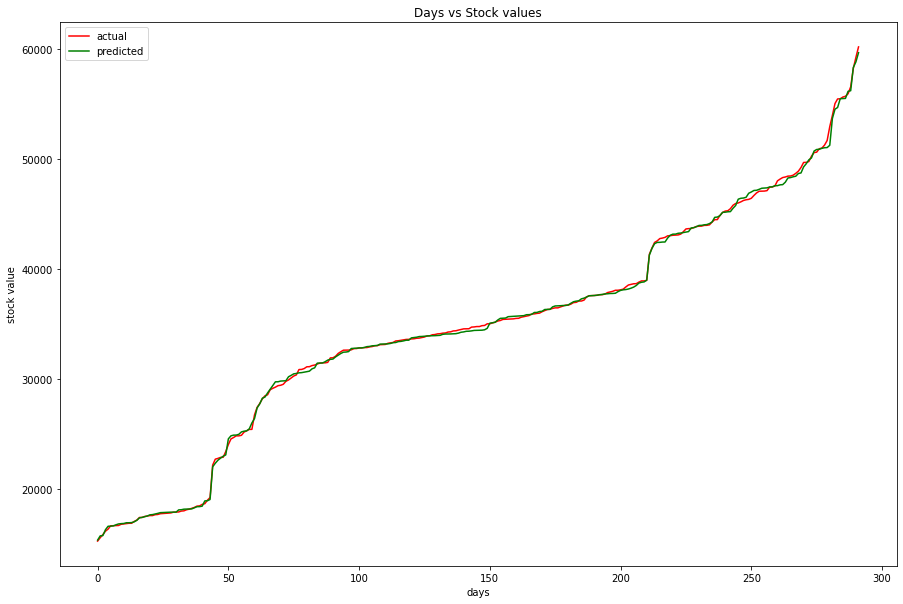

In [342]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(actual, color='r', label='actual')
ax.plot(predict_randomForest, color='g', label='predicted')
leg = ax.legend();
ax.set_xlabel("days")
ax.set_ylabel("stock value")
ax.set_title("Days vs Stock values")
fig.savefig("D:/PhD/PAPERS/PAPER 2/final paper/venky_modified/venky_modified/MYOUTPUTRESULTS/RandomForest_regresson.png")
DF = pd.DataFrame(data=[actual, predict_randomForest, absolute_error3]).T
DF.columns=['actual', 'predict_randomForest', 'absolute_error']
# save the dataframe as a csv file
DF.to_csv("D:/PhD/PAPERS/PAPER 2/final paper/venky_modified/venky_modified/MYOUTPUTdata/data_randomForest_regression.csv")

In [343]:
#imp_list = list(model.feature_importances_)

In [344]:
# model3.estimators_


In [345]:
len(model3.estimators_)

100

In [346]:
from sklearn import tree

In [347]:
#fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=3000)

# printing first 5 decision trees and saving them into a file
# u can modify it to whatever tree u wnat or all

#for index in range(0, 5):
   # tree.plot_tree(model.estimators_[index], ax = axes[index]);    
   # axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
    #fig.savefig('all_trees.png')


In [348]:
#col_lis = list(X_test.columns)

In [349]:
#feature_importances = {i[0]:"{0:.4f}".format(i[1]) for i in list(zip(col_lis,imp_list))}

In [350]:
import sklearn
print(sklearn.__version__)

0.24.2


# applying extratree regressor

In [351]:
from sklearn.ensemble import ExtraTreesRegressor

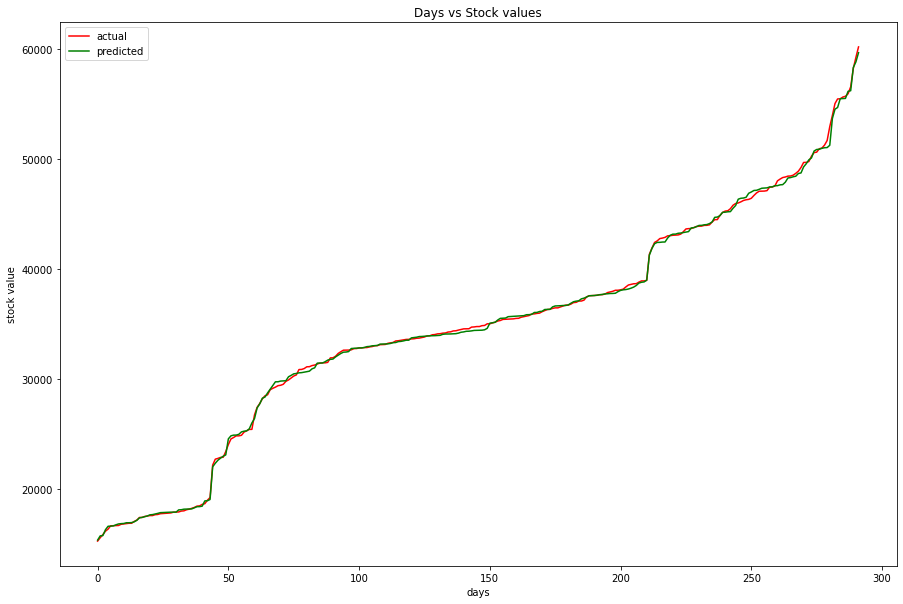

In [352]:
model4=ExtraTreesRegressor()
model4.fit(X_train,y_train)
predict_xtraa_regresson=model3.predict(X_test)

predict_xtraa_regresson=np.sort(predict_xtraa_regresson)
absolute_error4=abs(actual-predict_xtraa_regresson)

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(actual, color='r', label='actual')
ax.plot(predict_xtraa_regresson, color='g', label='predicted')
leg = ax.legend();
ax.set_xlabel("days")
ax.set_ylabel("stock value")
ax.set_title("Days vs Stock values")
fig.savefig("D:/PhD/PAPERS/PAPER 2/final paper/venky_modified/venky_modified/MYOUTPUTRESULTS/Extra_tree_regresson.png")

DF = pd.DataFrame(data=[actual, predict_xtraa_regresson, absolute_error4]).T
DF.columns=['actual', 'predict_xtraa_regresson', 'absolute_error']
# save the dataframe as a csv file
DF.to_csv("D:/PhD/PAPERS/PAPER 2/final paper/venky_modified/venky_modified/MYOUTPUTdata/data_xtraa_regresson.csv")

### absolute errors


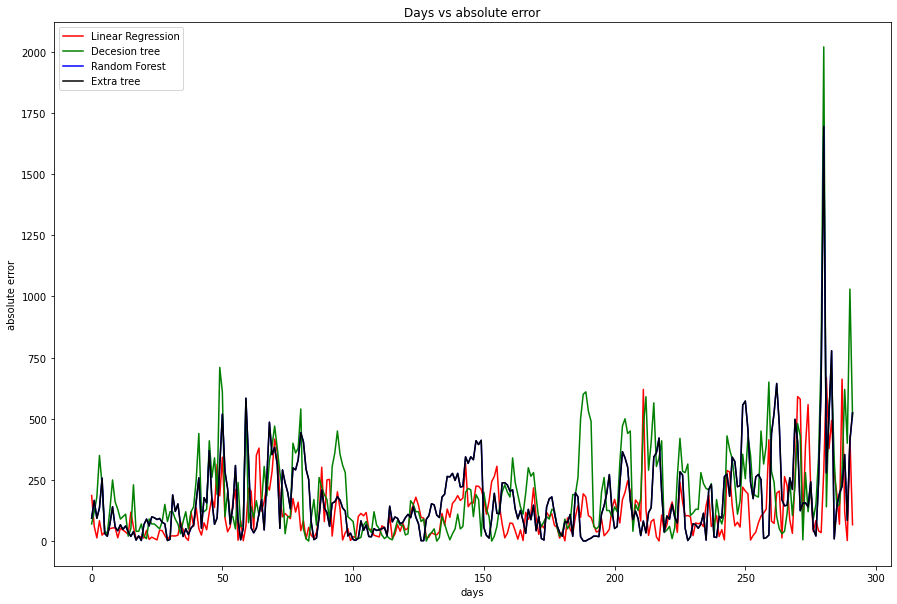

In [353]:
absolute_error1=abs(actual-predict_L)
absolute_error2=abs(actual-predict_Decision)
absolute_error3=abs(actual-predict_randomForest)
absolute_error4=abs(actual-predict_xtraa_regresson)

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(absolute_error1, color='r', label='Linear Regression')
ax.plot(absolute_error2, color='g', label='Decesion tree')
ax.plot(absolute_error3, color='b', label='Random Forest')
ax.plot(absolute_error4, color='k', label='Extra tree')
leg = ax.legend();
ax.set_xlabel("days")
ax.set_ylabel("absolute error")
ax.set_title("Days vs absolute error")
fig.savefig("D:/PhD/PAPERS/PAPER 2/final paper/venky_modified/venky_modified/MYOUTPUTRESULTS/absolute_errors.png")


In [354]:
from sklearn import metrics
print('Mean absolute errors\n')
print('MAE_L_regression:', metrics.mean_absolute_error(actual,predict_L))
print('MAE_Decesion_regression:', metrics.mean_absolute_error(actual,predict_Decision))
print('MAE_RandomForest_regression:', metrics.mean_absolute_error(actual,predict_randomForest))
print('MAE_Extra_regression:', metrics.mean_absolute_error(actual,predict_xtraa_regresson))
print('\n')
print(' Mean Squared errors\n')
print('MSE_L_regression:', metrics.mean_squared_error(actual,predict_L))
print('MSE_Decesion_regression:', metrics.mean_squared_error(actual,predict_Decision))
print('MSE_RandomForest_regression:', metrics.mean_squared_error(actual,predict_randomForest))
print('MSE_Extra_regression:', metrics.mean_squared_error(actual,predict_xtraa_regresson))
print('\n')
print(' Root Mean Squared errors\n')
print('RMSE_L_regression:', np.sqrt(metrics.mean_squared_error(actual,predict_L)))
print('RMSE_Decesion_regression:', np.sqrt(metrics.mean_squared_error(actual,predict_Decision)))
print('RMSE_RandomForest_regression:', np.sqrt(metrics.mean_squared_error(actual,predict_randomForest)))
print('RMSE_Extra_regression:', np.sqrt(metrics.mean_squared_error(actual,predict_xtraa_regresson)))


Mean absolute errors

MAE_L_regression: 117.09855432942108
MAE_Decesion_regression: 195.70205479452054
MAE_RandomForest_regression: 164.2015410958904
MAE_Extra_regression: 164.2015410958904


 Mean Squared errors

MSE_L_regression: 27288.080353208417
MSE_Decesion_regression: 77025.25684931508
MSE_RandomForest_regression: 54688.48771404107
MSE_Extra_regression: 54688.48771404107


 Root Mean Squared errors

RMSE_L_regression: 165.19104198838514
RMSE_Decesion_regression: 277.5342444623998
RMSE_RandomForest_regression: 233.85569848528615
RMSE_Extra_regression: 233.85569848528615


In [355]:
from sklearn import tree

In [356]:
print(len(model3.estimators_))

100


In [357]:
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,2), dpi=1000)
#tree.plot_tree(model3.estimators_[0])
#fig.savefig('all_extrees.png')